In [8]:
import pandas as pd
import numpy as np

In [9]:
df= pd.read_csv("clean_PCOS_data.csv")

In [10]:
df.head()

,Patient_File_No.,PCOS(Y/N),Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
0,1,0,28,44.6,152.0,19.3,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,24.9,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,25.3,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,29.7,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,20.1,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [11]:
df.columns

Index(['Patient_File_No.', 'PCOS(Y/N)', 'Age (yrs)', 'Weight(Kg)',
       'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse rate(bpm)',
       'Respiration_Rate(breaths/min)', 'Hemoglobin(g/dl)', 'Cycle(Reg/Irreg)',
       'Cycle_Length(days)', 'Marital_Years', 'Pregnant(Y/N)',
       'Abortion_Count', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip_Ratio', 'TSH(mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit_D3(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight_Gain(Y/N)', 'Hair_Growth(Y/N)', 'Skin_Darkening(Y/N)',
       'Hair_Loss(Y/N)', 'Pimples(Y/N)', 'Fast_Food(Y/N)', 'Reg_Exercise(Y/N)',
       'BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)', 'Follicles_Count(Left)',
       'Follicle_Count(Right)', 'Avg_Follicle_Size(L)(mm)',
       'Avg_Follicle_Size(R)(mm)', 'Endometrium(mm)'],
      dtype='object')

## Naive Bayes

<Figure size 800x600 with 0 Axes>

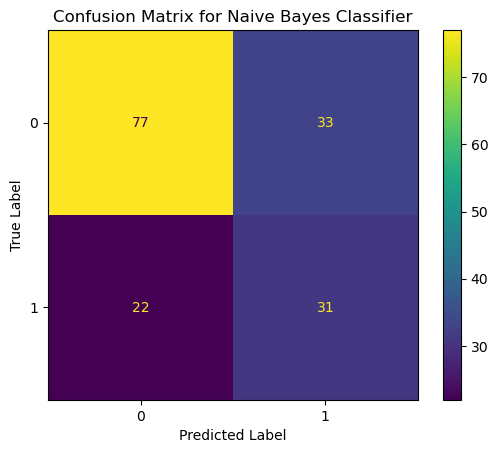

In [12]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Splitting the data into features (X) and target (y)
X = df.drop(["PCOS(Y/N)"], axis=1)  # Features
y = df["PCOS(Y/N)"]  # Target

# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb_classifier = MultinomialNB()
# Fitting the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculating the predicted probabilities for each class
y_pred_proba = nb_classifier.predict_proba(X_test)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
plt.figure(figsize=(8, 6))
disp.plot()
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
#Classification report
class_names = [str(c) for c in nb_classifier.classes_]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       110
           1       0.48      0.58      0.53        53

    accuracy                           0.66       163
   macro avg       0.63      0.64      0.63       163
weighted avg       0.68      0.66      0.67       163



In [18]:
X_train.head()

,Patient_File_No.,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
428,429,28,48.0,148.0,21.9,11,74,20,10.2,0,...,1,1.0,0,110,70,11,9,19.0,15.0,11.5
370,371,28,58.0,164.0,21.6,13,72,18,11.5,0,...,1,1.0,1,110,80,15,12,18.0,20.0,12.0
57,58,36,58.0,152.0,25.1,14,72,20,10.0,0,...,0,0.0,0,110,80,3,2,12.0,13.0,9.3
332,333,27,59.0,158.0,23.6,15,72,18,10.0,0,...,1,0.0,0,110,70,3,3,14.0,12.0,10.5
24,25,34,63.0,158.0,25.2,11,72,20,11.2,0,...,1,1.0,0,120,70,4,6,18.0,17.0,7.3


In [19]:
X_test.head()

,Patient_File_No.,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
229,230,28,74.3,154.0,31.3,13,72,18,10.7,0,...,0,1.0,0,110,80,6,5,14.0,13.0,8.5
73,74,26,70.0,163.0,26.3,15,72,18,10.5,0,...,0,0.0,0,110,80,3,4,10.5,6.0,9.8
352,353,27,60.0,164.0,22.3,15,72,18,10.7,0,...,0,1.0,0,120,80,4,5,15.0,18.0,8.0
86,87,31,64.0,156.0,26.3,15,74,18,12.1,1,...,0,0.0,0,120,80,8,10,15.0,13.0,10.0
470,471,34,52.0,149.0,23.4,13,80,20,12.0,1,...,0,1.0,1,110,80,8,10,17.0,20.0,7.0


## Decision Trees


In [7]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8256880733944955


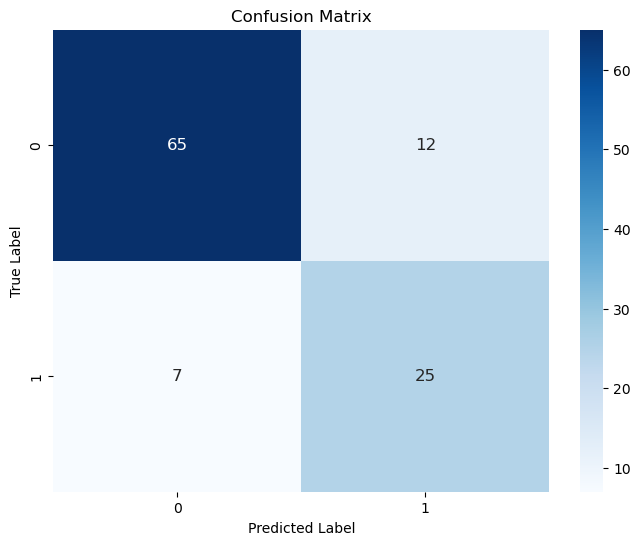

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

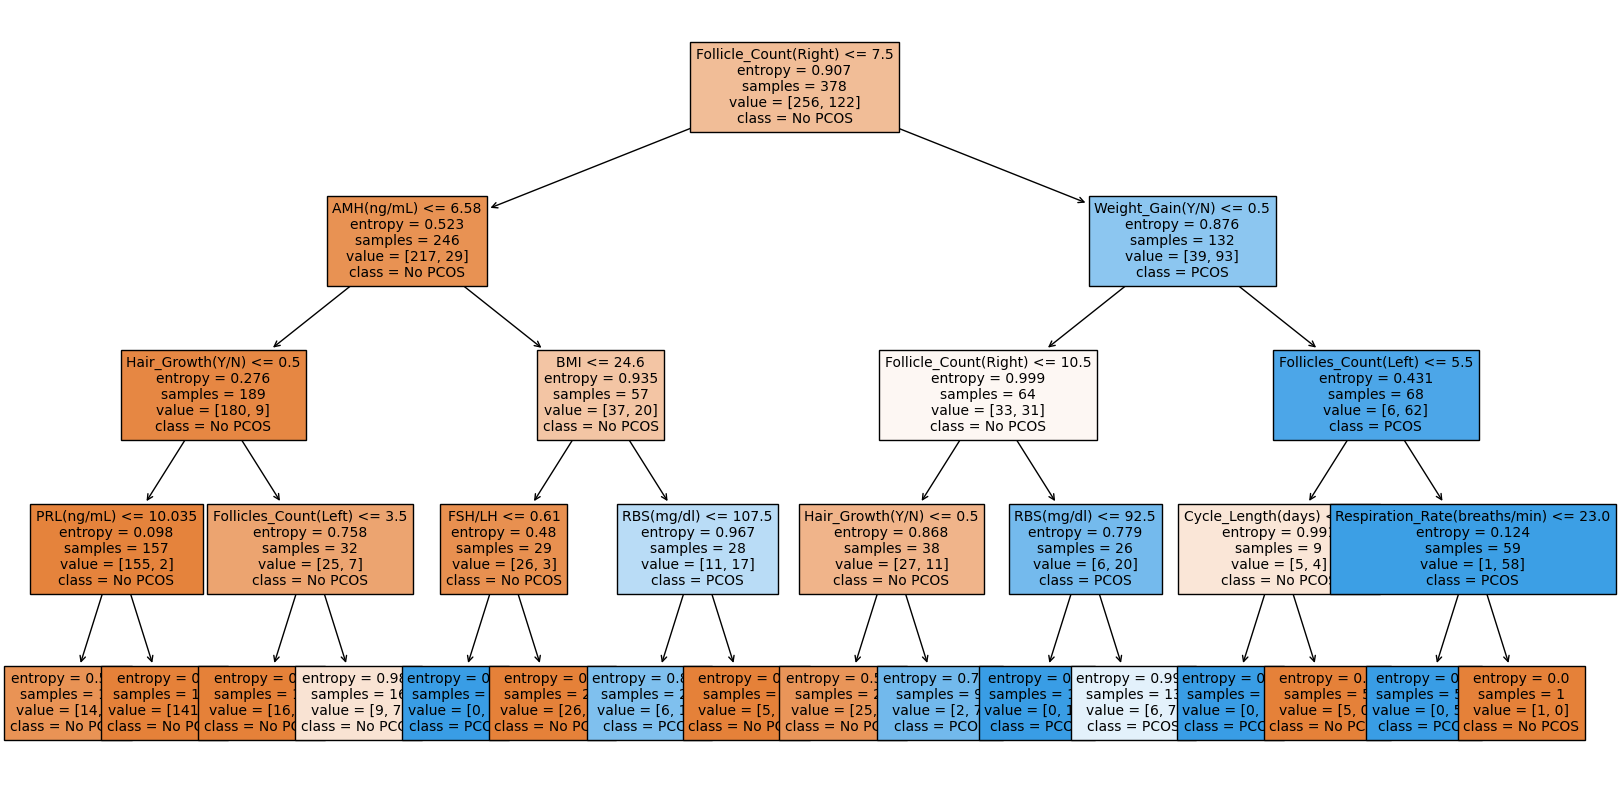

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Dropping unnecessary columns
df = df.drop(["Patient_File_No."], axis=1)

# Splitting the data into training and testing sets
TrainDF, TestDF = train_test_split(df, test_size=0.30)

# Extract target variable
TrainLabels = TrainDF["PCOS(Y/N)"]
TrainDF = TrainDF.drop(["PCOS(Y/N)"], axis=1)

TestLabels = TestDF["PCOS(Y/N)"]
TestDF = TestDF.drop(["PCOS(Y/N)"], axis=1)

# Initializing the decision tree classifier
MyDT = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4)

# Fitting the classifier on the training data
t = MyDT.fit(TrainDF, TrainLabels)

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(t, filled=True, fontsize=10, feature_names=TrainDF.columns.tolist(), class_names=["No PCOS", "PCOS"])
plt.show()

In [22]:
TrainDF.head()

,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),Cycle_Length(days),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
82,39,52.0,161.0,20.1,11,78,20,10.8,0,5,...,0,0.0,0,110,80,2,2,15.0,17.0,8.475915
66,41,56.0,160.0,21.9,13,78,20,11.5,0,5,...,0,0.0,0,120,80,1,2,10.0,12.0,9.700000
28,25,62.0,158.0,24.8,15,78,22,11.6,0,5,...,0,0.0,0,120,80,7,4,12.0,17.0,6.200000
167,29,60.0,150.0,26.7,15,73,20,10.7,0,6,...,1,1.0,0,120,80,11,12,14.0,15.0,10.000000
245,23,57.0,153.0,24.3,15,73,18,12.0,0,4,...,1,1.0,1,120,80,8,10,17.0,18.0,9.000000


In [25]:
TestDF.head()

,Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),Cycle_Length(days),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
414,30,64.0,158.000,25.6,11,74,22,10.2,0,4,...,1,1.0,0,110,70,12,14,14.0,14.0,9.50
492,25,58.0,155.448,24.0,14,72,18,10.8,0,5,...,0,0.0,0,120,80,1,2,19.0,18.0,10.35
192,30,67.0,167.000,24.0,12,72,22,12.0,1,5,...,1,0.0,1,110,80,2,4,10.0,13.0,6.00
1,36,65.0,161.500,24.9,15,74,20,11.7,0,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.70
265,40,32.0,152.000,13.9,15,72,20,10.0,0,3,...,0,1.0,1,120,80,6,5,18.0,17.0,8.00


In [21]:
df.head()

,PCOS(Y/N),Age (yrs),Weight(Kg),Height(Cm),BMI,Blood_Group,Pulse rate(bpm),Respiration_Rate(breaths/min),Hemoglobin(g/dl),Cycle(Reg/Irreg),...,Pimples(Y/N),Fast_Food(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicles_Count(Left),Follicle_Count(Right),Avg_Follicle_Size(L)(mm),Avg_Follicle_Size(R)(mm),Endometrium(mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


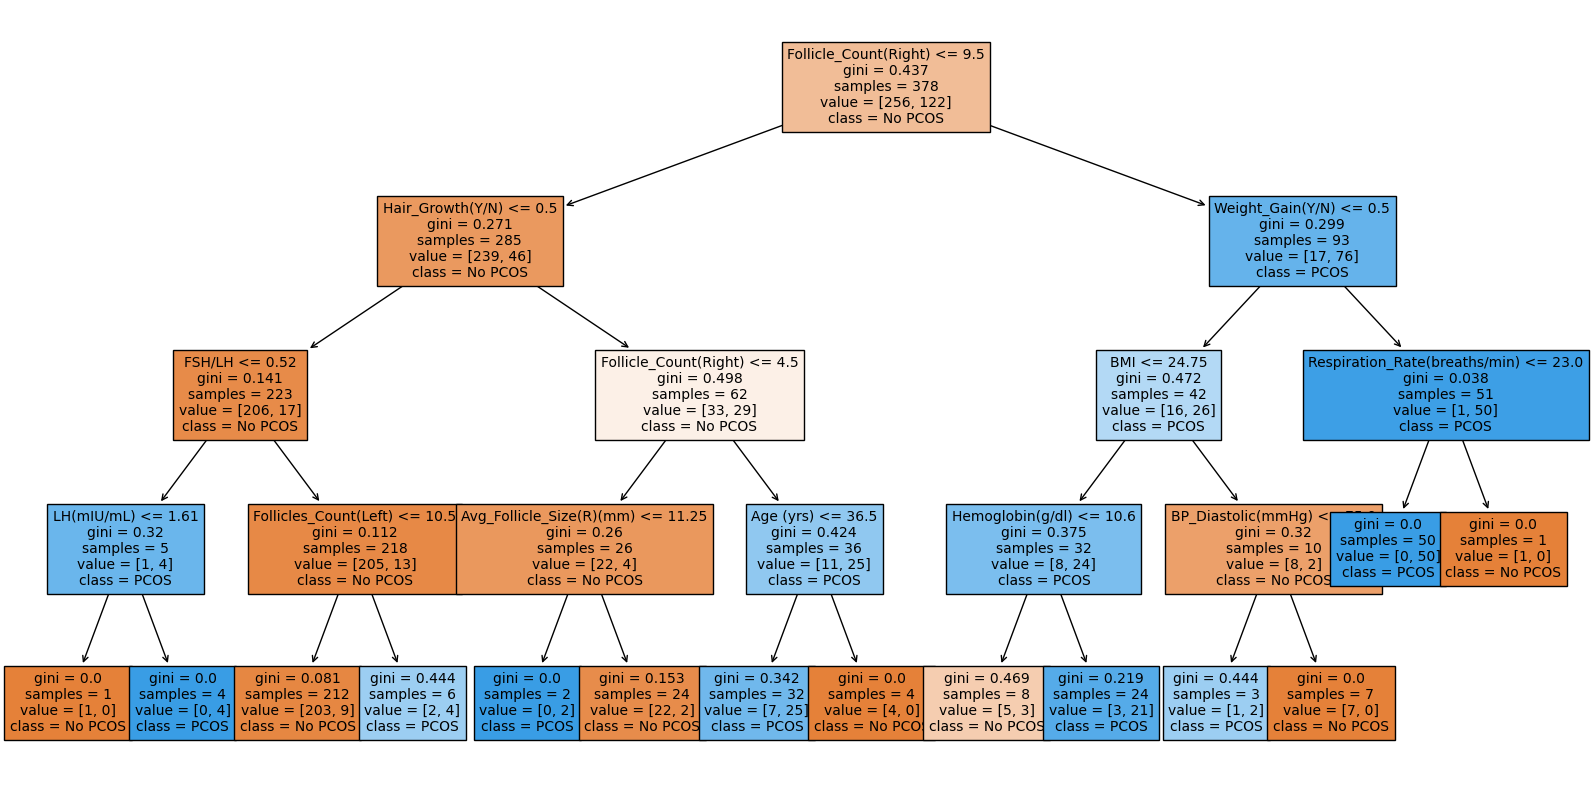

In [16]:
# Decision Tree 2 uses Gini impurity instead of entropy.

MyDT_Gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4)
# Fitting the classifier on the training data
t_gini = MyDT_Gini.fit(TrainDF, TrainLabels)

plt.figure(figsize=(20, 10))
plot_tree(t_gini, filled=True, fontsize=10, feature_names=TrainDF.columns.tolist(), class_names=["No PCOS", "PCOS"])
plt.show()


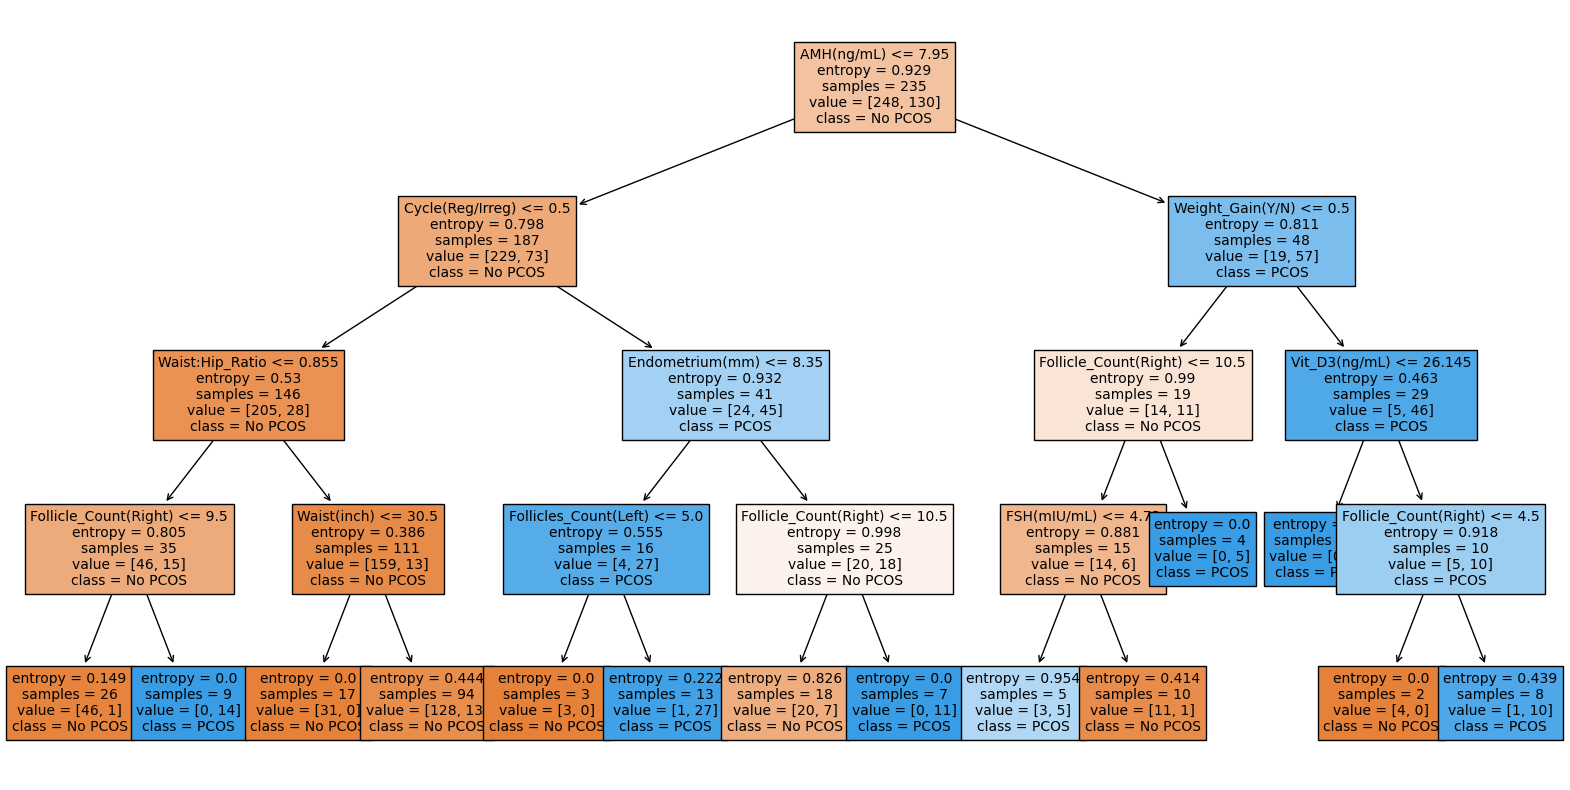

In [15]:
# Random Forest builds multiple decision trees and merges their predictions to improve accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, max_depth=4)

# Fitting the classifier on the training data
rf_classifier.fit(TrainDF, TrainLabels)

# Plotting one of the decision trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, fontsize=10, feature_names=TrainDF.columns.tolist(), class_names=["No PCOS", "PCOS"])
plt.show()

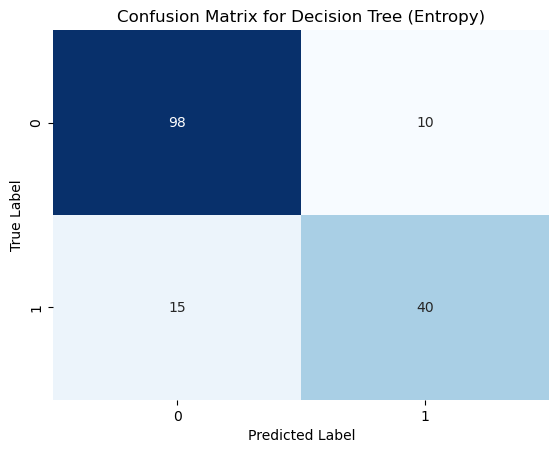

Accuracy for Decision Tree (Entropy): 0.8466257668711656


In [33]:
import seaborn as sns
from sklearn.metrics import accuracy_score

# Decision Tree 1 (Entropy)
sns.heatmap(cm_dt_entropy, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix for Decision Tree (Entropy)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_dt_entropy = accuracy_score(TestLabels, pred_dt_entropy)
print("Accuracy for Decision Tree (Entropy):", accuracy_dt_entropy)

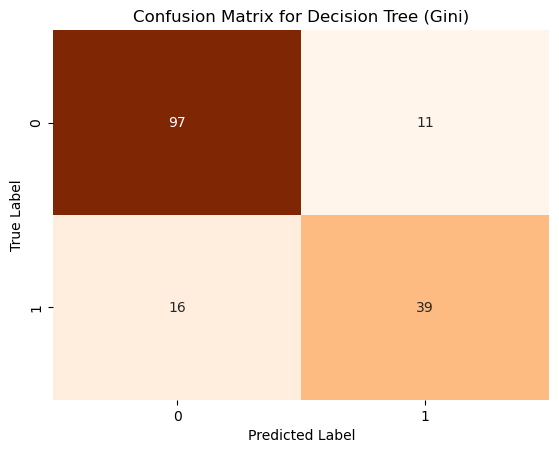

Accuracy for Decision Tree (Gini): 0.8343558282208589


In [34]:
# Decision Tree 2 (Gini)

sns.heatmap(cm_dt_gini, annot=True, cmap="Oranges", fmt="d", cbar=False)
plt.title("Confusion Matrix for Decision Tree (Gini)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_dt_gini = accuracy_score(TestLabels, pred_dt_gini)
print("Accuracy for Decision Tree (Gini):", accuracy_dt_gini)

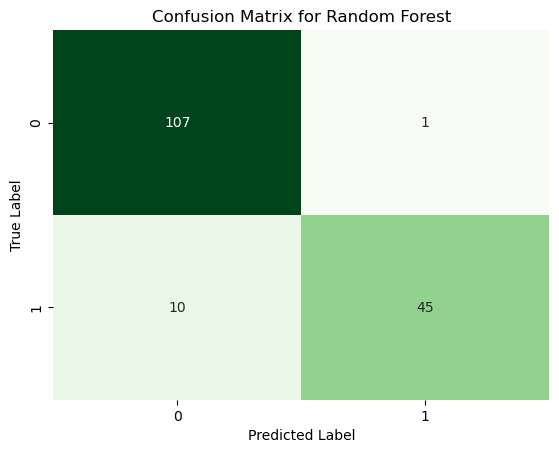

Accuracy for Random Forest: 0.9325153374233128


In [35]:
# Decision Tree 3 (Random Forest)

sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_rf = accuracy_score(TestLabels, pred_rf)
print("Accuracy for Random Forest:", accuracy_rf)